# Getting started `musif`

`musif` is a Python library to analyze music scores. It is a tool to massively extract features from MusicXML and MuseScore files.

`musif` was born in the context of the [ERC Project "DIDONE"](https://didone.eu/) and, consequently,
it is specialized in 18th-century Italian opera arias. However, it is also prepared to work with other repertoires.

This tutorial is an introduction for people who are not experts in programming. If you are already an expert, just skip to the [Data Section](#data) and then go to the [Advanced Tutorial]().


## Installation

First, you should install [`Python`](https://www.python.org/downloads/) > 3.10. An easy way to do this is by using [`Anaconda`](https://www.anaconda.com/products/distribution), especially if you are not used to commandline interface.A
Once you have installed `anaconda`:
1. Launch the `anaconda-navigator`
2. [Create an environment](https://docs.anaconda.com/navigator/getting-started/#managing-environments) selecting python version >= 3.10
3. Switch to the newly created environment by clicking on its name
4. [Install `jupyter`](https://docs.anaconda.com/anaconda/user-guide/getting-started/#run-python-in-a-jupyter-notebook).

To install `musif`:
1. [Download](https://raw.githubusercontent.com/DIDONEproject/musif/main/docs/source/Tutorial.ipynb) this notebook.
2. Start `jupyter` in your Anaconda environment.
3. Open this tutorial.
4. Run the following cell by clicking on it and pressing Ctrl+Enter.

In [1]:
!pip install musif

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.6/106.6 kB 2.6 MB/s eta 0:00:00 MB/s eta 0:00:01


Here, the `!` is a special command that executes commands in the terminal. After having run it, you may need to restart the notebook (click the circular arrow ↻ in the top bar, near the icons ▶ and ⏹)

Now, let's import `musif`:

In [3]:
import musif
musif.__version__

'1.0.0'

## Introduction

If you are new to Python, we suggest you to read an introductory tutorial for it, for instance, [this one](https://www.w3schools.com/python/default.asp). 

In the following, we will introduce some technical terminology that may be useful to you to understand technical documentation while working with `musif`:

* A _function_ is a way to represent code that is convenient for humans. You can think of functions as mathematical functions, with some input and some output. However, some programming languages call them _procedures_; this is not the case with Python, but this name allows grasping what functions are, after all: successions of commands that the computer has to execute.

* An _object_ is a computational way to represent information _and_ code in the memory of computers; you can think of objects as real concepts of the real world: objects have properties (in Python named _fields_) and functionalities (named _methods_). For instance, an object could be a vehicle, which has some properties (length, maximum speed, number of wheels) and some functionalities (accelerate, decelerate, stop). Objects can also have specializations (named _children_): in our example, a _child_ of vehicle could be the car and another _child_ could be the bike: they have different properties and apply the functionalities in a different way. Both the vehicle, the car, and the bike may have instances: the car that you use everyday to go to work is different from your friend's even if they have the same exact properties, because they are two different concrete objects. Technically, those two cars are two _instances_ of the same _class_. To create an instance, you have to call a function, generically named _constructor_, which takes as arguments the class and the other properties. This function will return the instance. To use `musif`, you don't need to know a lot about objects, but while you search the web it is good to have a little of knowledge.

* A _DataFrame_ is another way to represent information for computers. They are designed to be extremely efficient, even if sometimes some aspects of the information can get lost. They are mainly used for data science problems. You can think of a _DataFrame_ as a table, with rows and columns. Usually, rows are _instances_ while columns are _properties_. In data science, these words often become _samples_ and _features_/_variables_. A typical operation is to select only certain columns (properties) or only certain rows (instances) to select subset of the data or to modify the data itself.

* Don't be scared to use web search engines such as Google: searching the web in a proper way is one of the most important skills a programmer has!

### Main objects

When using `musif`, you will usually interface with two objects:
1. [`FeaturesExtractor()`](API/musif.extract.html#musif.extract.extract.FeaturesExtractor), which reads music scores and computes a DataFrame containing all the extracted features. In the simplest case, each row represents a music score, while each column represents a feature.
2. [`DataProcessor()`](API/musif.process.html#musif.process.processor.DataProcessor), which takes the DataFrame with all the features in it and post-processes it to clean, improve, and possibly modify some of the features.

These two objects take as input two different configurations that modify their behavior. In other words, the constructors of `FeaturesExtractor` and `DataProcessor` can accept a wide range of arguments.

But let's proceed step by step!

## Data

To start, download [this](https://zenodo.org/record/4027957) dataset and uncompress it in a folder named `data` in the same directory as this notebook. Alternatively, just run the following cell (click on it and press Ctrl+Enter):

In [3]:
import urllib.request
import zipfile
from pathlib import Path

data_dir = Path("data")
dataset_path = "dataset.zip"
urllib.request.urlretrieve("https://zenodo.org/record/4027957/files/AnatomyComposerAttributionMIDIFilesAndFeatureData_1_0.zip?download=1", dataset_path)
with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall(data_dir)

## Configuration

Let's create a configuration for our experiment. Configurations can be expressed using a `yaml` file or with key-value arguments. `yaml` files are designed for complex projects, while key-value arguments are perfect for simple situations like this.

Key-value arguments are something similar to a dictionary: There is a _key_ which must be unique in the dictionary; each _key_ is associated with a _value_, which can instead be repeated. Python can retrieve a value using its key in  a very efficient way!

First, we'll need to import the class that describes how a configuration is:

In [4]:
from musif.config import ExtractConfiguration

Now, we can call its constructor to obtain a configuration object:

In [5]:
import glob

config = ExtractConfiguration(
    None,
    musescore_dir="data",
    basic_modules=["scoring"],
    features=["core", "ambitus", "interval", "tempo", 
              "density", "texture", "lyrics", "scale", 
              "key", "dynamics", "rhytm"],
)

As you can see, the configuration has 3 values in this case:
1. `None`: this is just a place-holder: it would usually be the `yaml` file containing the configuration; since we do not need it, we use `None`.
2. The directory where MuseScore will look for the data; we'll use MuseScore to convert MIDI files into MusicXML, so you should first [download](https://musescore.org/en/download) and install it (Note: if you are running this notebook on a remote server without GUI, make sure to have a virtual display set up in the shell. running this notebook, e.g., `Xvfb :99 & export DISPLAY=:99`).
3. `basic_modules` are modules used to compute basic features needed for the successive ones.
4. `features` are the features that will be computed.

Each feature name is a word that refers to a set of features and to a musifpackage.
You can also create your own [custom features](./Custom_features.html), but it's a more advanced topic.
For now, just think about `basic_modules` and `features` as the same thing, but with a precedence order.

## Feature extraction

Now that we have our configuration, we pass it to the function that creates `FeaturesExtraction` objects. This function is exactly named `FeaturesExtraction`:

In [6]:
from musif.extract.extract import FeaturesExtractor

extractor = FeaturesExtractor(config)

Note: We could also pass the configuration values directly to `FeaturesExtractor`, like this:

In [7]:
extractor = FeaturesExtractor(
    None,
    musescore_dir="data",
    basic_modules=["scoring"],
    features=["core", "ambitus", "interval", "tempo", 
              "density", "texture", "lyrics", "scale", 
              "key", "dynamics", "rhytm"]
)

Before starting the extraction, we also need to tell MuseScore the type of files it should look for. In this case, we want it to look for files with extension `'.mid'`. By default, it would look for `.mscx` files, so we need to change it:

In [8]:
import musif.musescore.constants as musescore_c
musescore_c.MUSESCORE_FILE_EXTENSION = '.mid'

Now, we can start the extraction using the method `extract`. It will return a `DataFrame`:

In [9]:
df = extractor.extract()

100%|█████████████████████████████████████████████████████████████████████████████████| 175/175 [04:33<00:00,  1.56s/it]


In [10]:
# To show the DataFrame in a Jupyter notebook, just use it as last instruction of the cell, like this:
df

,FamilyInstrumentation,FamilyScoring,FamilyWw_Density,FamilyWw_Notes,FamilyWw_NotesMean,FamilyWw_NumberOfFilteredParts,FamilyWw_NumberOfParts,FamilyWw_SoundingDensity,FamilyWw_SoundingMeasures,FamilyWw_SoundingMeasuresMean,...,SoundFl_TrimmedIntervallicMean,SoundFl_TrimmedIntervallicStd,SoundScoring,Tempo,TempoGrouped1,TempoGrouped2,TimeSignature,TimeSignatureGrouped,Voices,WindowId
0,ww,ww,0.619932,367,91.75,4,4,0.660072,278,69.50,...,-0.113402,1.468171,fl,NA,NA,None,2/1,other,,0
1,ww,ww,0.872024,586,146.50,4,4,1.069343,274,68.50,...,-0.165236,1.616888,fl,NA,NA,None,2/1,other,,0
2,ww,ww,0.974593,959,239.75,4,4,1.175245,408,102.00,...,-0.103268,1.616436,fl,NA,NA,None,2/1,other,,0
3,ww,ww,0.736979,566,141.50,4,4,0.887147,319,79.75,...,-0.095556,1.564105,fl,NA,NA,None,2/1,other,,0
4,ww,ww,0.957692,498,124.50,4,4,1.101770,226,56.50,...,-0.073232,1.619699,fl,NA,NA,None,2/1,other,,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,ww,ww,1.070513,668,167.00,4,4,1.265152,264,66.00,...,-0.110902,1.629415,fl,NA,NA,None,2/1,other,,0
171,ww,ww,1.125000,729,182.25,4,4,1.285714,189,47.25,...,0.029260,1.760390,fl,NA,NA,None,3/1,other,,0
172,ww,ww,0.913306,453,113.25,4,4,1.198413,189,47.25,...,-0.049861,1.546242,fl,NA,NA,None,2/1,other,,0
173,ww,ww,0.904412,369,92.25,4,4,1.111446,166,41.50,...,-0.051195,1.598028,fl,NA,NA,None,2/1,other,,0


## Post-processing

Most of the features we have computed actually need some post-processing, for instance to replace `NaN` with 0, merge columns, or remove features created while computing other features.

For this, we need a further step. In the next cell we will:
1. Instantiate a `DataProcessor` object using:
    * the generated DataFrame
    * the default configuration (i.e. `None` in place of the yaml file/configuration object)
2. Call the method `process()` of that object to start the post-processing of the features
3. We retrieve the post-processed data from the field `data`
4. We print the size of the DataFrame.

In [11]:
from musif.process.processor import DataProcessor

processed_df = DataProcessor(df, None).process().data

# with `.shape` you can see the number of rows and columns of the dataframe
processed_df.shape


Processing DataFrame...

Preprocessing data...

Deleting not useful columns...


Adjusting NaN values: 100%|█████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 1080.68it/s]


(175, 500)

As you see, the columns are now fewer than before!

Let's try to remove `NaN` (elements that should be number but that cannot be expressed, e.g., the division $0/0$. To do this, we'll use the [`dropna` method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html?highlight=dropna#pandas.DataFrame.dropna) of the `pandas.DataFrame` object.

In [12]:
processed_df.dropna(axis=1, inplace=True)
processed_df.shape

(175, 396)

The dataset was not very well formatted and this is the reason why only a few features remain.

## Statistical processing

Let's try to classify the features. We will setup a feature-learning approach with an autoencoder architecture.

For this, we will use `sklearn` and its Multilayer Perceptron, so you will need to [install](https://docs.anaconda.com/navigator/getting-started/#managing-packages) `scikit-learn` and `seaborn` packages in your anaconda environment.

In the next cell, the topic becomes a little more technical, but it's just an example to show that you can use this DataFrame for statistical analysis. We will first remove redundant information (the `FileName` and the `Id` columns that were automatically assigned by the `FeatureExtractor`). 

Then, we will create a model which:
1. Assigns a number to each feature that has strings as values (`OrdinalEncoder`).
2. Standardizes the features to get comparable values.
3. Trains a simple feed-forward fully connected autoencoder with ReLU activations and LBGFS optimizer.

The objective is to learn a 2D space where the 396 extracted features can be represented without loosing information.

In [17]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error

# removing FileName and Id
if 'FileName' in processed_df:
    del processed_df['FileName']
if 'Id' in processed_df:
    del processed_df['Id']

preprocessor = make_pipeline(
    OrdinalEncoder(), # give a cardinal number to features that are categories
    StandardScaler(), # subtract the mean and scale between -1 and +1
)

model = make_pipeline(
    preprocessor,
    MLPRegressor(    
        hidden_layer_sizes=(128, 32, 8, 2, 8, 32, 128, 396), # the output size is the same as the number of features
        activation="relu",
        solver="lbfgs",
        max_iter=100,
        tol=0.1,
        random_state=934,
        max_fun=10**6
        # shuffle=True  
    )
)

y_true = preprocessor.fit_transform(processed_df)
# the next call will take some time...
model.fit(processed_df, y_true)
y_hat = model.predict(processed_df)
print(f"Mean Absolute Error: {mean_absolute_error(y_true, y_hat)}")

Mean Absolute Error: 0.4468922497339742


/home/federico/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Now, we will attach a method `transform` to the MLPClassifier which returns the activations at the inner layer with 2 outputs, that we interpret as latent features. To compare the features, we will scale them in [0, 1].

Then, we plot the music scores according to the learned feature space.

In [18]:
from sklearn.preprocessing import MinMaxScaler

mlpclassifier = model['mlpregressor']

def mytransform_method(X):
    activations = [None for _ in range(mlpclassifier.n_layers_)]
    activations[0] = X
    X = mlpclassifier._forward_pass(activations)[-6]
    return MinMaxScaler().fit_transform(X)

mlpclassifier.transform = mytransform_method

learned_features = model.transform(processed_df)

learned_features.shape

(175, 2)

<AxesSubplot: >

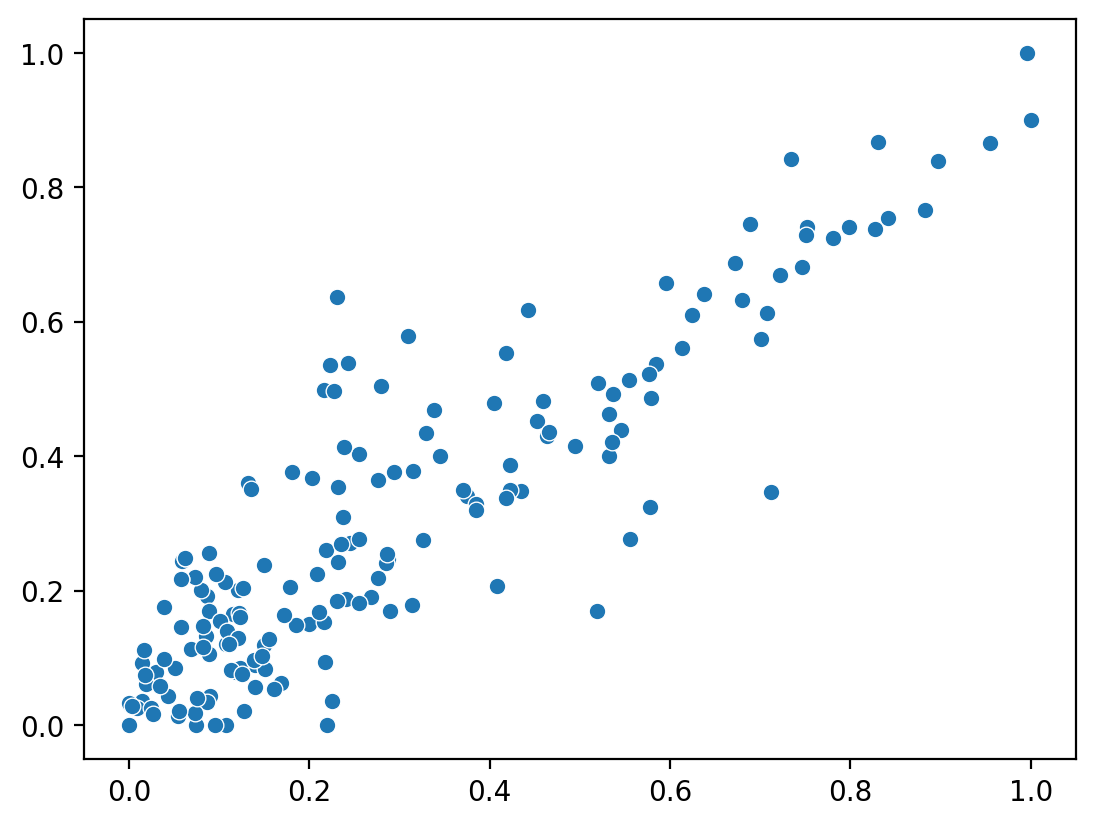

In [19]:
import seaborn
seaborn.scatterplot(x=learned_features[:, 0], y=learned_features[:, 1])

For comparison, let's plot the 2D features learned by a standard PCA (the final scaler is aded to compare with the autoencoder):

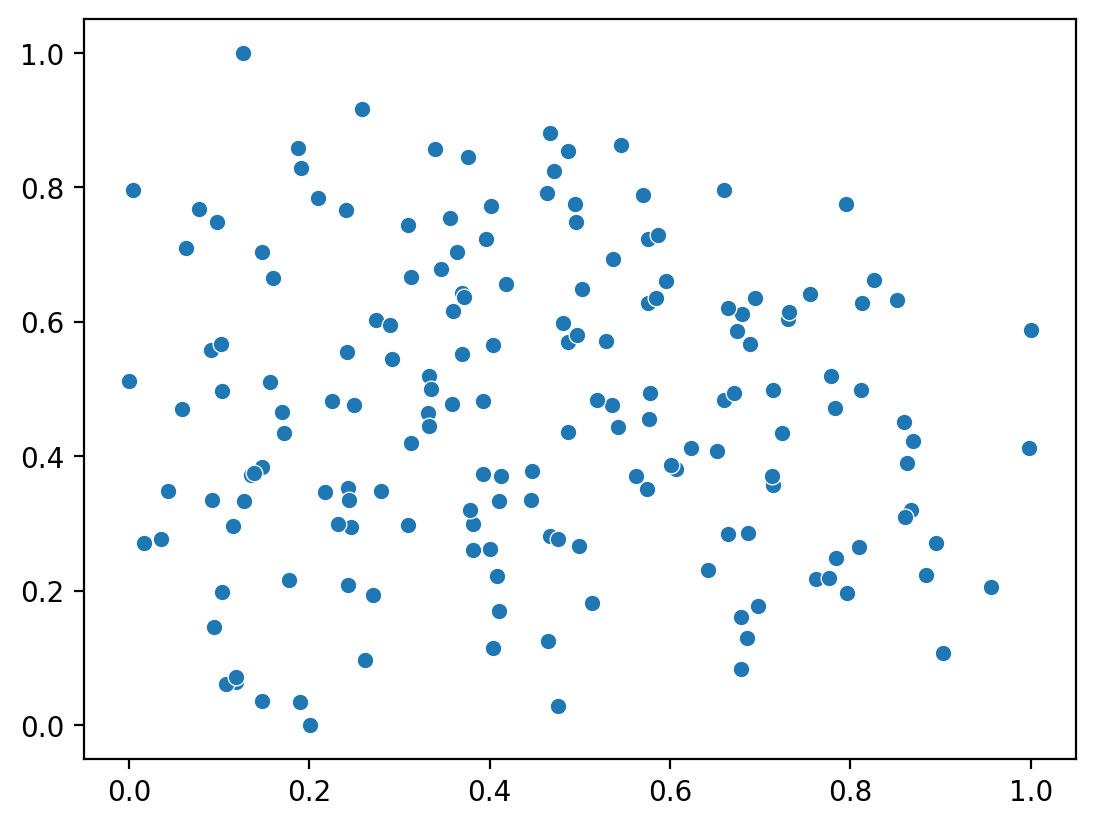

In [21]:
from sklearn.decomposition import PCA

pca_pipeline = make_pipeline(
    preprocessor, PCA(2), MinMaxScaler()
)
data_pca = pca_pipeline.fit_transform(processed_df)
ax = seaborn.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1])